# Which Passengers on the Titanic Survived?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv',index_col=0)
df_test = pd.read_csv('test.csv',index_col=0)
print(df_train.shape, df_test.shape)


(891, 11) (418, 10)


In [3]:
print(df_train.head(2))
print('*********************************************************************************')
print(df_test.head(2))

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   

             SibSp  Parch     Ticket     Fare Cabin Embarked  
PassengerId                                                   
1                1      0  A/5 21171   7.2500   NaN        S  
2                1      0   PC 17599  71.2833   C85        C  
*********************************************************************************
             Pclass                              Name     Sex   Age  SibSp  \
PassengerId                                                                  
892               3                  Kelly, Mr. James   

## EDA

#### Let's explore the attributes (variables) in the train set. First get info.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


####  Make a bar chart for Survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

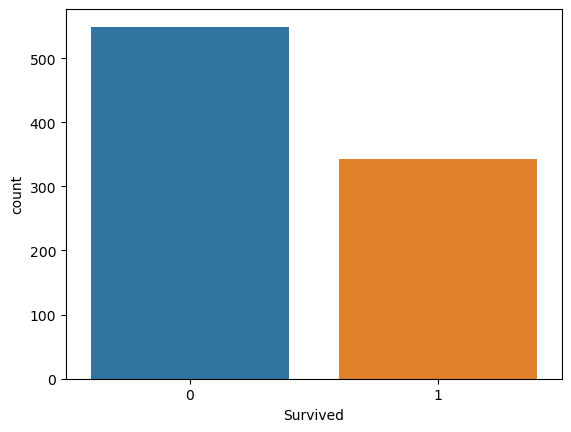

In [5]:
sns.countplot(x='Survived', data=df_train)

#### Make a countplot showing Survived according to Pclass.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

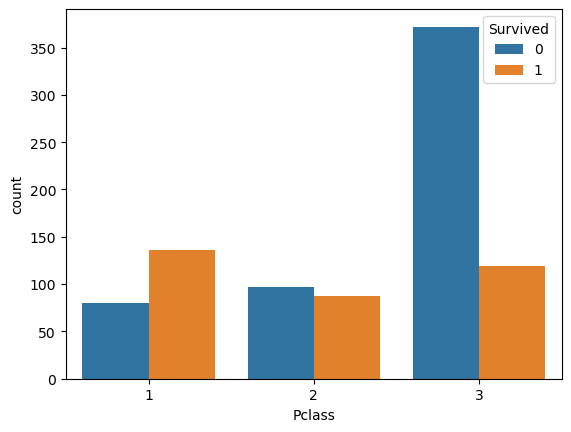

In [6]:
sns.countplot(x='Pclass',hue='Survived',data=df_train)

#### Do the same for Sex 

<AxesSubplot:xlabel='Sex', ylabel='count'>

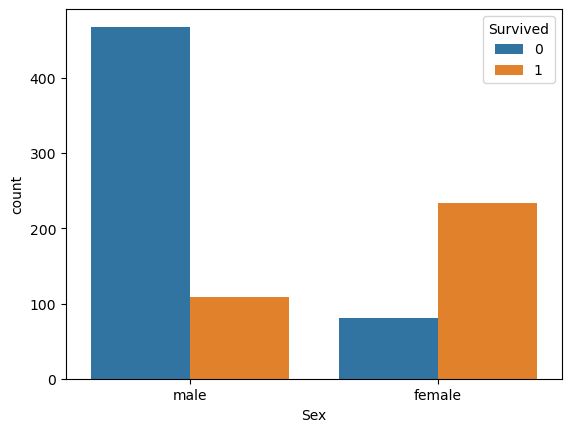

In [7]:
sns.countplot(x='Sex',hue='Survived',data=df_train)

#### Now a histogram showing the distribution of Age for non survivors and for survivors

(array([[ 18.,  27., 114., 104.,  66.,  46.,  24.,  15.,   9.,   1.],
        [ 36.,  19.,  63.,  65.,  52.,  24.,  21.,   9.,   0.,   1.]]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 2 BarContainer objects>)

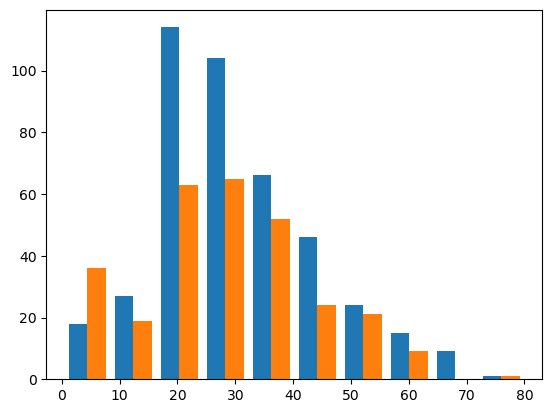

In [8]:
plt.hist([df_train.Age[df_train.Survived==0],df_train.Age[df_train.Survived==1]])

#### And countplots for SibSp and Parch

<AxesSubplot:xlabel='SibSp', ylabel='count'>

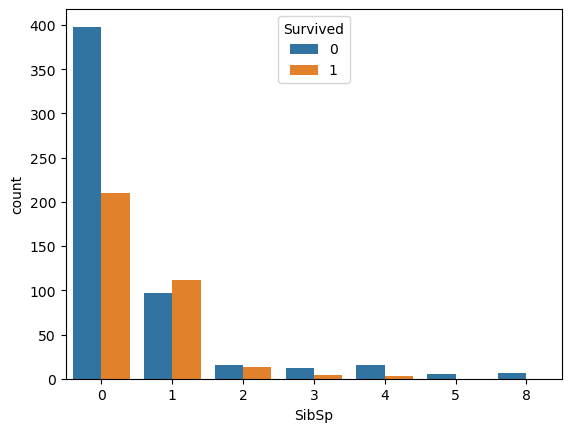

In [9]:
sns.countplot(x='SibSp',hue='Survived',data=df_train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

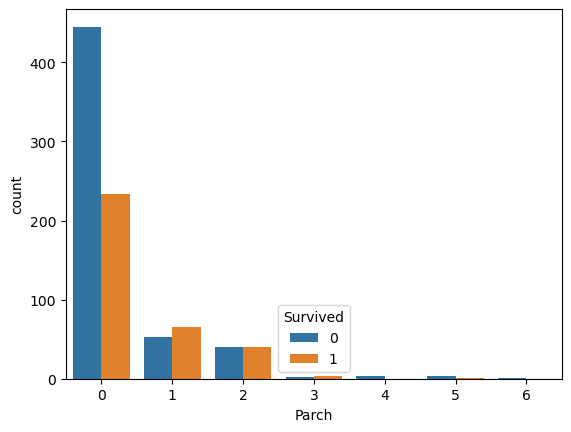

In [10]:
sns.countplot(x='Parch',hue='Survived',data=df_train)

#### Make a 3 histograms  side by side showing the fare distribution according to passenger class

Text(0.5, 0, 'Pclass 3')

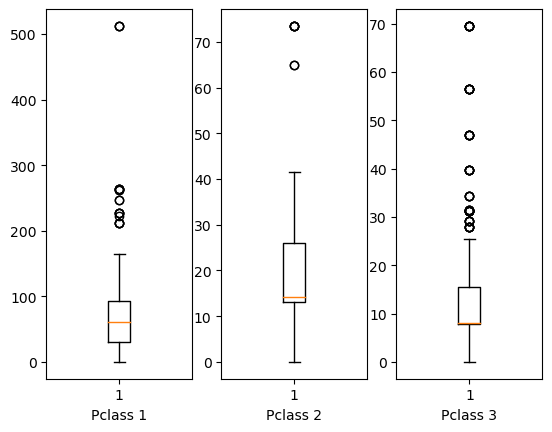

In [11]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3)
ax1.boxplot(df_train.Fare[df_train.Pclass==1])
ax1.set_xlabel('Pclass 1' )
ax2.boxplot(df_train.Fare[df_train.Pclass==2])
ax2.set_xlabel('Pclass 2' )
ax3.boxplot(df_train.Fare[df_train.Pclass==3])
ax3.set_xlabel('Pclass 3' )                              

#### And now a histogram showing Fare for survivors and non survivors.

(array([[499.,  36.,   8.,   0.,   4.,   2.,   0.,   0.,   0.,   0.],
        [233.,  70.,  23.,   2.,   7.,   4.,   0.,   0.,   0.,   3.]]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 2 BarContainer objects>)

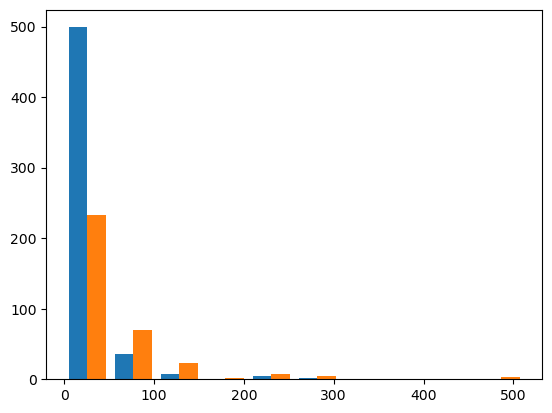

In [12]:
plt.hist([df_train.Fare[df_train.Survived==0],df_train.Fare[df_train.Survived==1]])

#### Lastly, make a countplot of Embarked for survivors and non survivors.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

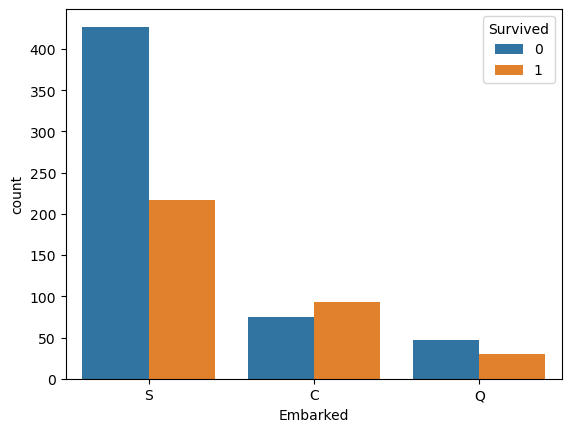

In [13]:
sns.countplot(x='Embarked',hue='Survived',data=df_train)

## Data preprocessing

#### We will need to manipulate both the train and test attributes into the same forms.

#### Extract target variable from train set and drop from train set.

In [14]:
target = df_train.Survived
df_train = df_train.drop('Survived',axis=1)
df_train.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### Make new data frame df by concatenating the rows of df_train and df_test. In the new data frame the first 890 rows are from the train set so we can resplit before training the model.

In [15]:
df = pd.concat([df_train, df_test])
df.shape

(1309, 10)

#### Sex and Embarked will need to become dummy variables, and perhaps instead of Cabin we can make a  boolean has_cabin.

In [16]:
df = pd.get_dummies(df, columns=['Sex','Embarked'])
df['has_cabin'] = df.Cabin.notnull()
df =df.drop('Cabin',axis=1)
df.head(3)

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,has_cabin
PassengerId,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,False
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,True
3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,False


#### Age has many missing values. We have to fill in age with some value so we can use the attribute. So fillna with the median age.

In [17]:
df.Age.fillna(df.Age.median(), inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      1309 non-null   int64  
 1   Name        1309 non-null   object 
 2   Age         1309 non-null   float64
 3   SibSp       1309 non-null   int64  
 4   Parch       1309 non-null   int64  
 5   Ticket      1309 non-null   object 
 6   Fare        1308 non-null   float64
 7   Sex_female  1309 non-null   uint8  
 8   Sex_male    1309 non-null   uint8  
 9   Embarked_C  1309 non-null   uint8  
 10  Embarked_Q  1309 non-null   uint8  
 11  Embarked_S  1309 non-null   uint8  
 12  has_cabin   1309 non-null   bool   
dtypes: bool(1), float64(2), int64(3), object(2), uint8(5)
memory usage: 89.5+ KB


#### There is one missing Fare. Give it the median value according to its Pclass.

In [19]:
df[df.Fare.isnull()]

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,has_cabin
PassengerId,,,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",60.5,0,0,3701,NaN,0,1,0,0,1,False


In [20]:
df.Fare[df.Pclass==3].median()

8.05

In [21]:
df.Fare.fillna(8.05,inplace=True)


#### There are more things that can be done to improve the data but we will use what we have done. Drop Name and Ticket and the split into train and test again

In [22]:
df.drop(['Name','Ticket'],axis=1, inplace=True)
df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,has_cabin
PassengerId,,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1,False
2,1,38.0,1,0,71.2833,1,0,1,0,0,True
3,3,26.0,0,0,7.9250,1,0,0,0,1,False
4,1,35.0,1,0,53.1000,1,0,0,0,1,True
5,3,35.0,0,0,8.0500,0,1,0,0,1,False


In [23]:
df_train = df.iloc[0:891,:]
df_train.shape

(891, 11)

In [24]:
df_test=df.iloc[891:,:]
df_test.shape

(418, 11)

## Train Tree Model

#### We need a validation set . Use sklearn train_test_split with 20% for validation

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(df_train,target,test_size=0.2,random_state=1)
print(X_train.shape, X_val.shape)

(712, 11) (179, 11)


#### Create Decision Tree Classifier and train model

In [26]:
import sklearn.tree as tree
dt = tree.DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=3,min_samples_leaf=2)

In [27]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=1)

#### Make tree diagram

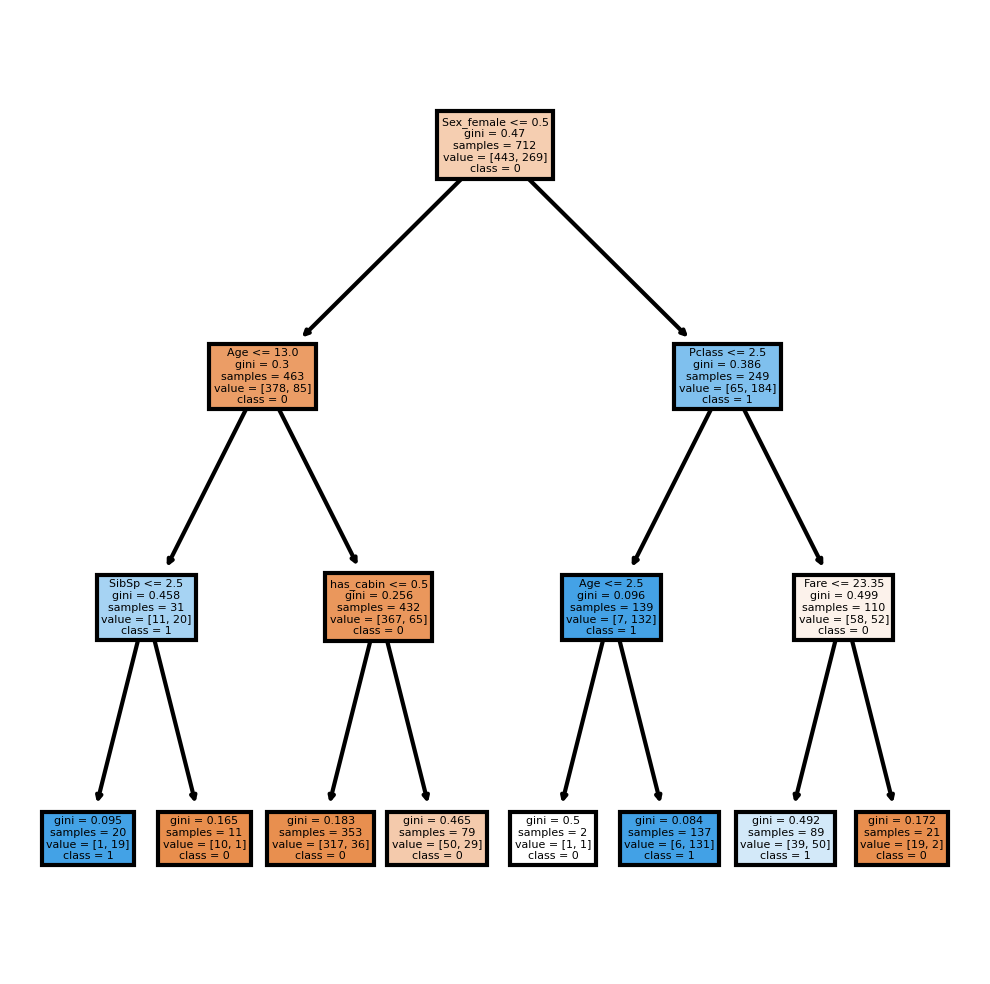

In [28]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dt,
           feature_names = list(X_train.columns), 
           class_names=['0','1'],
           filled = True);

fig.savefig('imagename.png')

#### Predict target for validation test. Make confusion matrix and calculate accuracy and ROC AUC for predicitons on train and validation sets

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score
y_pred = dt.predict(X_val)
conf_mat = confusion_matrix(y_true=y_val,y_pred = y_pred)
print(conf_mat)

[[95 11]
 [24 49]]


In [35]:
y_train_pred=dt.predict(X_train)
print("Train Acc is ", accuracy_score(y_train,y_train_pred)*100.0)
print("Train ROC AUC is ", roc_auc_score(y_train,y_train_pred))
print("Test Acc is ", accuracy_score(y_val,y_pred)*100.0)
print("Test ROC AUC is ", roc_auc_score(y_val,y_pred))

Train Acc is  83.84831460674157
Train ROC AUC is  0.820558543892185
Test Acc is  75.41899441340783
Test ROC AUC is  0.7242181442233135


#### Can you improve this by tuning the parameters?

In [31]:
dt = tree.DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=3,min_samples_leaf=2)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_val)
conf_mat = confusion_matrix(y_true=y_val,y_pred = y_pred)
print(conf_mat)
print("Acc is ", accuracy_score(y_val,y_pred)*100.0)
print("ROC AUC is ", roc_auc_score(y_val,y_pred))

[[95 11]
 [24 49]]
Acc is  80.44692737430168
ROC AUC is  0.7837296459033343


#### Let's run a random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print("Test Acc is ", accuracy_score(y_val,y_pred)*100.0)
print("Test ROC AUC is ", roc_auc_score(y_val,y_pred))
conf_mat = confusion_matrix(y_true=y_val,y_pred = y_pred)
print(conf_mat)

Test Acc is  75.97765363128491
Test ROC AUC is  0.7331997932282244
[[93 13]
 [30 43]]


#### Now we will predict survivors on the test set and make a submission file for the kaggle competition

In [33]:
Survived = dt.predict(df_test)
d = {'PassengerID':df_test.index,'Survived':Survived}
pred = pd.DataFrame(data=d)
pred.head()

,PassengerID,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [34]:
pred.to_csv('submission.csv',index=False)

#### Submit file to competition at [https://www.kaggle.com/competitions/titanic/overview]